These are examples of typical variables and plots that we look at in our sea ice diagnostics package. The most current version of the sea ice diagnostics are in the CESM Postprocessing. More information here: [CESM Postprocessing](https://github.com/NCAR/CESM_postprocessing).

In exercise 1, you will learn about plotting sea ice area and other variables on a polar projection.

The first step is to import the libraries needed to plot the data. Here we will use `xarray` as a tool to read the netCDF file. We will use `numpy` for some basic math calculations. For plotting the data we will neet `matplotlib`, `pop_tools`, `geocat` and `cartopy`.

**Exercise 1: Plot Sea Ice Concentration on a polar projection.**

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.gridspec import GridSpec
import pop_tools
from datetime import datetime
import glob
#import geocat.datafiles as gdf
import geocat.viz.util as gvutil
#from geocat.viz import cmaps as gvcmaps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import nc_time_axis

The next few steps read in sea ice concentration or `aice` from one of the CESM2 large ensemble historical runs. Note this operation points to multiple files on the campaign file system and so we are using the `xarray` function `open_mfdataset` for a multifile dataset. We will also print the `aice` dataset to get an idea of the metadata and dimensions. Note that we could use the 10 year simulation from the tutorial. However, 10 years is very short and is not a very interesting timeseries. Instead we can use one of the CESM2 Large Ensemble historical simulations. [Rodgers et al. 2021](https://doi.org/10.5194/esd-12-1393-2021)

In [2]:
files = "/glade/campaign/cgd/cesm/CESM2-LE/ice/proc/tseries/month_1/aice/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cice.h.aice.*"

ds = xr.open_mfdataset(files)

aice = ds['aice']

print(aice)

<xarray.DataArray 'aice' (time: 1980, nj: 384, ni: 320)>
dask.array<concatenate, shape=(1980, 384, 320), dtype=float32, chunksize=(120, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged


The next step is to read in some grid information for the `gx1v7` dipole grid used in POP and CICE. We will also convert the TAREA units from the default cm^2 to m^2. Finally we display the grid dataset to look at the metadata.

In [3]:
# get pop grid grid cell areas
grid = pop_tools.get_grid('POP_gx1v7')

# convert tarea to m^2
with xr.set_options(keep_attrs=True):
    grid['TAREA'] = grid['TAREA']/(1e4)
grid['TAREA'].attrs['units'] = 'm^2'

grid

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60, nreg: 13)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
  * nreg         (nreg) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/15)
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    ...           ...
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 7.639e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
    region_name  (nreg) <U21 'Black Sea' 'Baltic Sea' ... 'Hudson Bay'
    region_val   (nreg) int64 -13 -12 -5 1 2 3 4 6 7 8 9 10 11
Attributes:
    lateral_dims:       [384, 320]
    vertical_dims:      60
    vert_grid_file:     gx1v7_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/gx1v7/grid/horiz_grid_20010402.ieeer8
    topography_fname:   inputdata/ocn/pop/gx1v7/grid/topography_20161215.ieeei4
    region_mask_fname:  inputdata/ocn/pop/gx1v7/grid/region_mask_20151008.ieeei4
    type:               dipole
    title:              POP_gx1v7 grid

We will merge in three main variables: `tarea`, `TLAT`, and `TLON`. These are the areas of the gridcells along with the latitudes and longitudes of the gridcell centers. Note that this overwrites the dataset object from above.

In [4]:
ds = xr.merge([aice.drop(['TLAT', 'TLON', 'ULAT', 'ULON']),
               grid[['TLAT', 'TLONG', 'TAREA']].rename_dims({'nlat':'nj','nlon':'ni'})],
              compat='identical', combine_attrs='no_conflicts')

The next step is to set up the northern hemisphere polar stereographic projection for plotting the sea ice concentration `aice`. We are using a "rainbow" colormap here and cutting off the plot with a circular boundary. Note that we are only plotting the first timeslice of the `aice` array here.

Text(0.5, 1.0, 'Sea Ice Concentration')

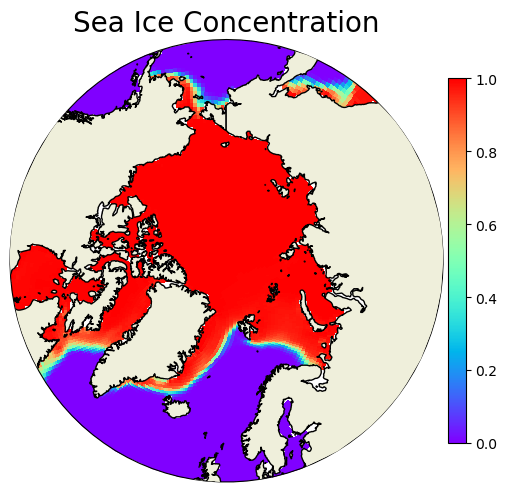

In [5]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

cmap = plt.cm.get_cmap('rainbow')  
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1, projection=ccrs.NorthPolarStereo())
ax.set_boundary(circle, transform=ax.transAxes)
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, 90, 55], crs=ccrs.PlateCarree())
this=ax.pcolormesh(ds['TLONG'],
                   ds['TLAT'],
                   ds['aice'].sel({'time':'1850-02-01 00:00:00'}).squeeze(),
                   cmap=cmap,vmax=1,vmin=0,
                   transform=ccrs.PlateCarree())
plt.colorbar(this,orientation='vertical',fraction=0.04,pad=0.01)
plt.title('Sea Ice Concentration',fontsize=20)

Questions

0. Why do we use February 1 to display the January monthly average? What does this mean for selecting e.g. September values?

1. Try other colormaps here. Some examples to try: `viridis`, `plasma`, `Blues`. Try reversing the colormaps. Hint: add the string `_r` to the colormap name.

2. Try a different timeslice from aice. Note the number of timeslices in the metadata you printed above. Note that the calendar goes from 1850-01 to 2015-12 as these are monthly mean time slices. Can you compute an annual mean over the 165 years and plot that? Can you compute the September mean over the 165 years and plot that?

Hint: Use aice.mean(dim='time')

3. Try sea ice thickness `hi` now. What happens to the colorbar? Try increasing the maximum value `vmax`. Note that you have to change the files that are read in.

Hint: Do a search and replace on `aice` with `hi`.

4. Now how about the Southern Hemisphere?


<div class="alert alert-success">   
<details>
<summary><font face="Times New Roman" color='blue'>Click here for the solution</font></summary><br>

1. Colormaps
```
cmap = plt.cm.get_cmap('viridis')
cmap = plt.cm.get_cmap('plasma')
cmap = plt.cm.get_cmap('Blues')
cmap = plt.cm.get_cmap('Blues_r')
```
<br>

2. Means
```
this=ax.pcolormesh(ds['TLONG'],
                   ds['TLAT'],
                   ds['aice'].sel({'time':'1850-10-01 00:00:00'}).squeeze(),
                   cmap=cmap,vmax=1,vmin=0,
                   transform=ccrs.PlateCarree())

this=ax.pcolormesh(ds['TLONG'],
                   ds['TLAT'],
                   ds['aice'].mean(dim='time'),
                   cmap=cmap,vmax=1,vmin=0,
                   transform=ccrs.PlateCarree())

this=ax.pcolormesh(ds['TLONG'],
                   ds['TLAT'],
                   ds['aice'].sel(time=ds.time.dt.month.isin([10])).mean(dim='time'),
                   cmap=cmap,vmax=1,vmin=0,
                   transform=ccrs.PlateCarree())
```
<br>

3. Ice Thickness
```
- change all occurences of `aice` to `hi`
- Try `vmax = 5`
```

4. Southern Hemisphere
```
ax = fig.add_subplot(1,3,1, projection=ccrs.SouthPolarStereo())

ax.set_extent([0.005, 360, -90, -55], crs=ccrs.PlateCarree())
```

</details>
</div>

**Exercise 2: Plot a time series of total sea ice area.**

The first step is to compute the ice area in each grid cell by multiplying the grid cell areas by the ice area fraction. Then we subset to just grid cells in the Northern hemisphere (using `where`). Finally, we sum over all of the grid cells. We can do these operations in a single line:

In [6]:
ds_area = (ds.TAREA*ds.aice).where(ds.TLAT>0).sum(dim=['nj','ni'])

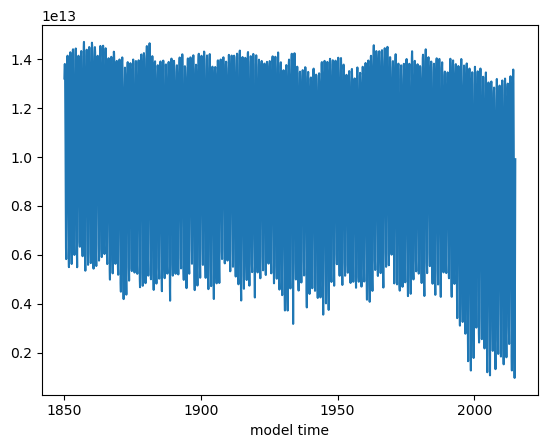

In [7]:
ds_area.plot()

This plot looks very noisy! Why do you think this is? Hint: you have plotted how many years of monthly mean data? Let's try just plotting September instead.

Refresher question: Why do we use `ds_area.time.dt.month.isin([10])` to

In [ ]:
ds_area.sel(time=ds_area.time.dt.month.isin([10])).plot()

Things to try:

1. Try plotting the March total area time series.

2. Try computing total ice volume and plotting it. Hint: Use the variable `hi` in place of `aice`. Note that volume is units of $m^3$. So, you might want to scale the volume by $1.0e-13$.

3. What does the Southern Hemisphere sea ice area and volume look like?

<div class="alert alert-success">   
<details>
<summary><font face="Times New Roman" color='blue'>Click here for the solution</font></summary><br>

1. March total area.
```
ds_area.sel(time=ds_area.time.dt.month.isin([4])).plot()
```
<br>

2. Ice Volume
```
ds_vol = (ds.TAREA*ds.hi).where(ds.TLAT>0).sum(dim=['nj','ni'])
```
<br>
    
3. Southern Hemisphere
```
ds_area = (ds.TAREA*ds.aice).where(ds.TLAT<0).sum(dim=['nj','ni'])
```
    
</details>
</div>